<a href="https://colab.research.google.com/github/hamid220/hnkh/blob/master/c20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
!unzip Covid_Data_GradientCrescent.zip

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:03, 40.3MB/s]
Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all

In [0]:
import numpy as np
import tensorflow as tf
DATASET_PATH = '/content/two/train'
test_dir = '/content/two/test'
IMAGE_SIZE = (150, 150)
NUM_CLASSES = len(DATASET_PATH )
BATCH_SIZE = 10 
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 


In [0]:
print(NUM_CLASSES)

18


In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="binary",
 )
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="binary",

 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
 !sudo python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),metrics=['acc'])

In [0]:
STEP_SIZE_TRAIN = train_batches.n//train_batches.batch_size
STEP_SIZE_VALID = valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches, steps_per_epoch = STEP_SIZE_TRAIN, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID, epochs= NUM_EPOCHS,
 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 3s 309ms/step - loss: 0.1079 - acc: 0.9468 - val_loss: 0.3117 - val_acc: 0.8000
Epoch 2/20
10/10 [==============================] - 3s 299ms/step - loss: 0.1085 - acc: 0.9574 - val_loss: 0.5190 - val_acc: 0.8000
Epoch 3/20
10/10 [==============================] - 3s 326ms/step - loss: 0.2200 - acc: 0.9149 - val_loss: 0.1524 - val_acc: 0.9500
Epoch 4/20
10/10 [==============================] - 3s 323ms/step - loss: 0.0947 - acc: 0.9500 - val_loss: 0.2973 - val_acc: 0.9000
Epoch 5/20
10/10 [==============================] - 3s 338ms/step - loss: 0.0686 - acc: 0.9681 - val_loss: 0.1400 - val_acc: 0.9500
Epoch 6/20
10/10 [==============================] - 3s 320ms/step - loss: 0.0916 - acc: 0.9681 - val_loss: 0.0690 - val_acc: 0.9500
Epoch 7/20
10/10 [==============================] - 3s 346ms/step - loss: 0.1544 - acc: 0.9362 - val_loss: 0.3857 - val_acc: 0.9500
Epoch 8/20
10/10 [==============================] - 3s 297ms/step - loss: 0.

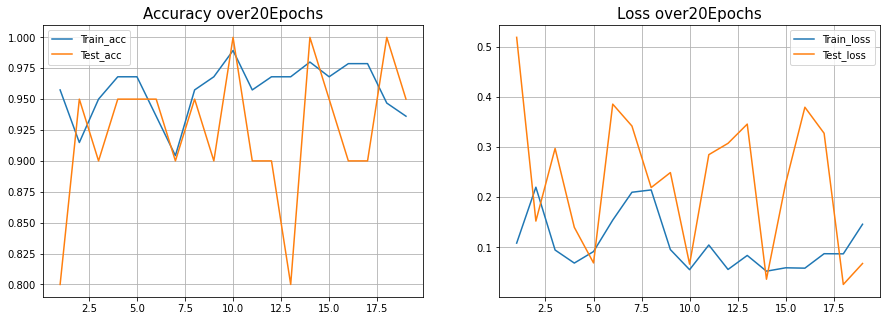

In [0]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 acc = result.history['acc']
 loss = result.history['loss']
 val_acc = result.history['val_acc']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
 test_dir,target_size=IMAGE_SIZE,
 batch_size=1,
 shuffle=False,
 seed=42,
 
 
 class_mode="binary")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 18 images belonging to 2 classes.
ERROR! Session/line number was not unique in database. History logging moved to new session 68
Instructions for updating:
Please use Model.evaluate, which supports generators.
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - acc: 1.0000
Test loss: 0.005332398694008589
Test accuracy: 1.0


ERROR! Session/line number was not unique in database. History logging moved to new session 80
10/10 [==============================] - 0s 36ms/step
Predictions finished
covid/nejmoa2001191_f3-PA.jpeg


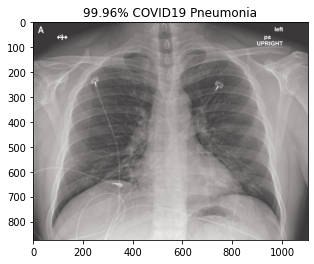

covid/nejmoa2001191_f4.jpeg


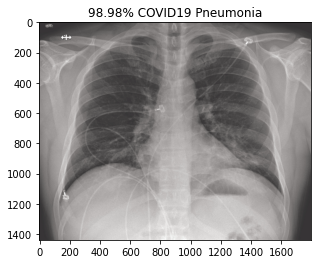

covid/nejmoa2001191_f5-PA.jpeg


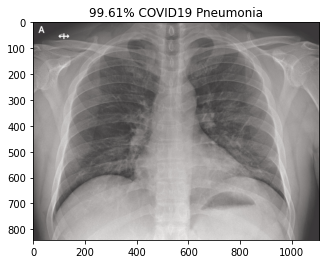

covid/radiol.2020200490.fig3.jpeg


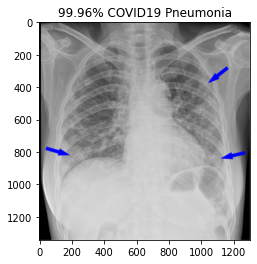

covid/ryct.2020200028.fig1a.jpeg


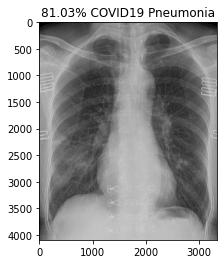

covid/ryct.2020200034.fig2.jpeg


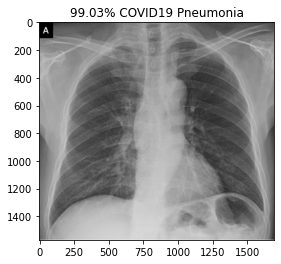

covid/ryct.2020200034.fig5-day0.jpeg


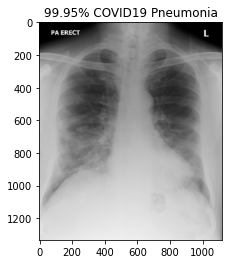

covid/ryct.2020200034.fig5-day4.jpeg


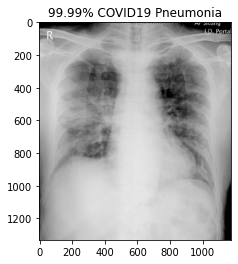

covid/ryct.2020200034.fig5-day7.jpeg


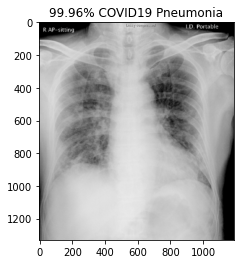

normal/NORMAL2-IM-1385-0001.jpeg


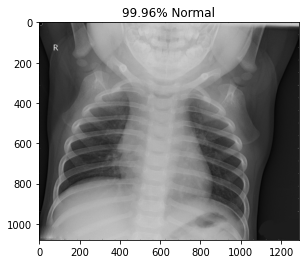

In [0]:
eval_generator.reset() 
pred = model.predict_generator(eval_generator,10,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir + "/" +eval_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
 pixels = np.array(image)
 plt.imshow(pixels)
 print(eval_generator.filenames[index])
 if probability > 0.5:
  plt.title("%.2f" % (probability[0]*100) + "% Normal")
  plt.show()
 else:
  plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
  plt.show()

In [0]:
print(index)

18
